# Outlier detection using t-SNE for visualization 

In [3]:
import os
import pandas as pd

print("Directory corrente:", os.getcwd())

file_path = 'dm2_dataset_2425_imdb/preprocessed_full.csv'
if os.path.exists(file_path):
    print(f"File trovato: {file_path}")
    df = pd.read_csv(file_path)
else:
    print(f"File non trovato: {file_path}")

Directory corrente: /Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_project
File trovato: dm2_dataset_2425_imdb/preprocessed_full.csv


In [4]:
from support.df_init import init
df = init(path=file_path)
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,reviewsTotal
0,Carmencita,"(5, 6]",1894,1894.0,1.0,0,2089,1,10,2,...,0,0.399732,1,0,0,0,0,0,0,19
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0,0.046115,0,0,0,1,0,0,0,1
2,Chinese Opium Den,"(4, 5]",1894,1894.0,1.0,0,195,1,10,1,...,0,0.399732,1,0,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,1.0,1,2237,1,10,3,...,0,0.399732,1,0,0,0,0,0,0,22
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,1.0,0,13115,1,10,12,...,2,0.046115,0,0,0,1,0,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,1993.0,96.0,0,11,1,10,0,...,0,0.001417,0,0,0,0,0,1,0,0
149527,Eco,"(6, 7]",2019,2019.0,14.0,0,15,1,10,4,...,0,0.017834,0,0,0,1,0,0,0,1
149528,Women Take Center Stage,"(5, 6]",2019,2019.0,NaN,0,12,1,10,2,...,0,0.000000,0,0,0,0,0,0,0,0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,2011.0,10.0,0,9,1,10,1,...,0,0.000000,0,0,0,0,0,0,0,0


In [5]:
# impute missing runtimeMinutes
from support.imputation import impute_runtime_minutes

impute_rt = impute_runtime_minutes(df)

# impute missing runtimeMinutes
df['runtimeMinutes'] = impute_rt(df)
df['runtimeMinutes']

0         17.0
1         12.0
2         17.0
3         17.0
4         17.0
          ... 
149526    96.0
149527    14.0
149528    30.0
149529    24.0
149530    45.0
Name: runtimeMinutes, Length: 149531, dtype: float64

In [ ]:
# #DATA PARTITIONING

# from sklearn.model_selection import train_test_split, cross_val_score 

# from sklearn.metrics import accuracy_score, f1_score, classification_report
# from sklearn.metrics import roc_curve, auc, roc_auc_score

# train_df, test_df = train_test_split(df, test_size=0.80, random_state=42)

# print("Train set size:", len(train_df))
# print("Test set size:", len(test_df))

In [13]:
df['totalMedia'] = df['totalImages'] + df['totalVideos'] + df['externalLinks'] + df['quotesTotal']
df.drop(['totalVideos', 'totalImages', 'quotesTotal', 'externalLinks'], axis=1, inplace=True)
df.drop(['endYear', 'isAdult', 'bestRating', 'worstRating', 'numVotes', 'originalTitle', 'isRatable', 'rating',
         'countryOfOrigin', 'genres', 'soundMixes', 'regions'], axis=1, inplace=True)
df['totalNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']
df.drop(['awardWins', 'awardNominationsExcludeWins'], axis=1, inplace=True)
df['reviewsTotal'] = df['criticReviewsTotal'] + df['userReviewsTotal']
df.drop(['criticReviewsTotal', 'userReviewsTotal'], axis=1, inplace=True)
# df['deltaCredits'] = df['totalCredits'] - (df['castNumber'] + df['writerCredits'] + df['directorsCredits'])
# df.drop(['totalCredits', 'castNumber', 'writerCredits', 'directorsCredits'], axis=1, inplace=True)
# attenzione a deltaCredits perchè crea 81 inf 

In [14]:
import numpy as np

# List of columns to transform
columns_to_log_transform = [
    'reviewsTotal', 'numRegions', 'ratingCount', 
    'companiesNumber', 'totalCredits', 'castNumber', 
    'writerCredits', 'directorsCredits',
    'totalMedia', 'totalNominations'
]

# Apply log transformation
for col in columns_to_log_transform:
    if col in df.columns:  # Ensure the column exists in the DataFrame
        df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x)

# Verify the transformation
df[columns_to_log_transform].head()

,reviewsTotal,numRegions,ratingCount,companiesNumber,totalCredits,castNumber,writerCredits,directorsCredits,totalMedia,totalNominations
0,2.995732,2.079442,7.646354,1.386294,1.609438,0.693147,0.0,0.693147,2.484907,0.000000
1,0.693147,1.945910,5.214936,0.000000,1.098612,0.000000,0.0,0.693147,1.791759,0.000000
2,0.000000,1.791759,5.278115,0.693147,0.693147,0.000000,0.0,0.693147,1.791759,0.000000
3,3.135494,1.945910,7.713785,1.945910,1.609438,0.693147,0.0,0.693147,2.302585,0.693147
4,4.418841,3.091042,9.481588,1.791759,2.484907,1.945910,0.0,1.098612,3.526361,0.000000


In [16]:
df.columns

Index(['startYear', 'runtimeMinutes', 'totalCredits', 'titleType',
       'canHaveEpisodes', 'numRegions', 'ratingCount', 'castNumber',
       'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
       'totalMedia', 'totalNominations', 'deltaCredits', 'regions_freq_enc',
       'regions_EU', 'regions_NA', 'regions_AS', 'regions_AF', 'regions_OC',
       'regions_SA', 'regions_UNK', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
       'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
       'countryOfOrigin_UNK', 'reviewsTotal'],
      dtype='object')

In [ ]:
# Perform one-hot encoding for the 'titleType' variable
title_type_encoded = pd.get_dummies(df['titleType'], prefix='titleType')

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, title_type_encoded], axis=1)

# Drop the original 'titleType' column
# df.drop(columns=['titleType'], inplace=True) no perchè la uso per runtimeMinutes (però nell'altro notebook, questa volta ho usato la funzione in support)

# Display the updated DataFrame
df.head()

,startYear,runtimeMinutes,totalCredits,titleType,canHaveEpisodes,numRegions,ratingCount,castNumber,companiesNumber,averageRating,...,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame
0,1894,17.0,1.609438,short,False,2.079442,7.646354,0.693147,1.386294,5.7,...,False,True,False,False,False,False,False,False,False,False
1,1892,12.0,1.098612,short,False,1.945910,5.214936,0.000000,0.000000,5.4,...,False,True,False,False,False,False,False,False,False,False
2,1894,17.0,0.693147,short,False,1.791759,5.278115,0.000000,0.693147,5.0,...,False,True,False,False,False,False,False,False,False,False
3,1894,17.0,1.609438,short,False,1.945910,7.713785,0.693147,1.945910,5.4,...,False,True,False,False,False,False,False,False,False,False
4,1896,17.0,2.484907,short,False,3.091042,9.481588,1.945910,1.791759,7.4,...,False,True,False,False,False,False,False,False,False,False


In [19]:
df.drop(columns=['titleType'], inplace=True)

In [21]:
from pyod.models.abod import ABOD
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ensure only numeric columns are used for ABOD
X = df.select_dtypes(include=[np.number])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the ABOD model
abod = ABOD(n_neighbors=20, method='fast')  # You can adjust n_neighbors based on your dataset size
abod.fit(X_scaled)

# Get the outlier scores
scores = abod.decision_function(X_scaled)  # Lower scores indicate more anomalous points

# Determine the threshold for the top 1% of outliers
threshold = np.percentile(scores, 1)  # 1% threshold
outliers = scores < threshold  # Boolean mask for outliers

# Add the outlier information to the DataFrame
df['ABOD_Score'] = scores
df['Outlier'] = outliers

# Display the outliers
outliers_df = df[df['Outlier']]
print(outliers_df)

        startYear  runtimeMinutes  totalCredits  canHaveEpisodes  numRegions  \
24547        1903            17.0      0.693147            False    0.693147   
31332        1900            15.0      0.693147            False    0.693147   
40638        1903            17.0      0.693147            False    0.693147   
40738        1903            17.0      0.693147            False    0.693147   
40742        1903            17.0      0.693147            False    0.693147   
...           ...             ...           ...              ...         ...   
147500       2018            24.0      3.433987            False    0.693147   
147736       2018            24.0      3.465736            False    0.693147   
148483       2018            24.0      2.639057            False    0.693147   
148868       2015            42.0      0.000000            False    0.000000   
149474       2019            41.0      3.526361            False    2.079442   

        ratingCount  castNumber  compan

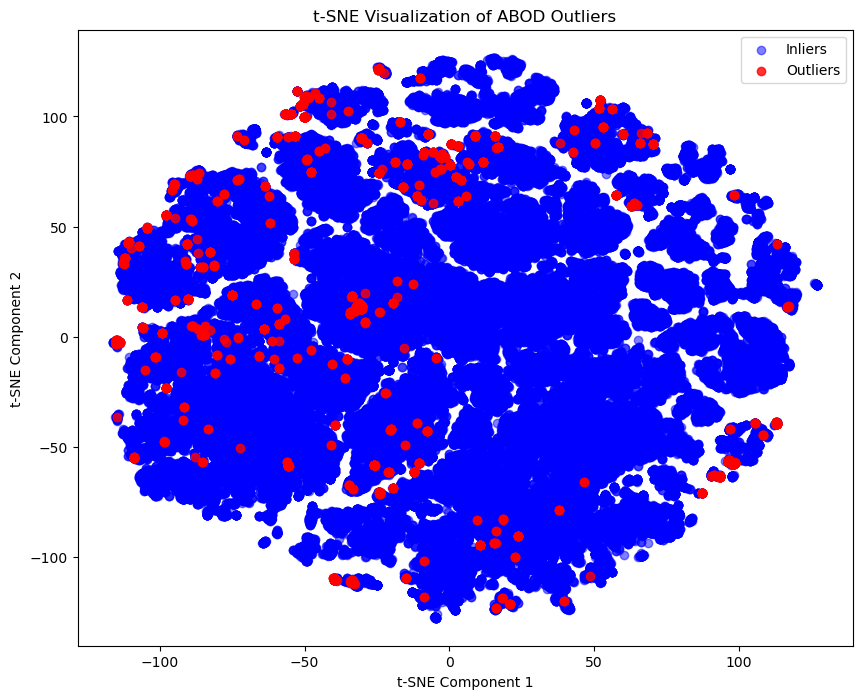

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the scaled data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
df['tSNE_1'] = X_tsne[:, 0]
df['tSNE_2'] = X_tsne[:, 1]

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(df.loc[~df['Outlier'], 'tSNE_1'], df.loc[~df['Outlier'], 'tSNE_2'], 
            c='blue', label='Inliers', alpha=0.5)
plt.scatter(df.loc[df['Outlier'], 'tSNE_1'], df.loc[df['Outlier'], 'tSNE_2'], 
            c='red', label='Outliers', alpha=0.8)
plt.title('t-SNE Visualization of ABOD Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()